## Dataset Analysis

In [1]:
import os
import scipy.io
import pandas as pd

# Define the base directory
base_dir = r'C:\\Users\\ferri\\Downloads\\PoliTO\\Tesi\\DSs\\Emotion-Stress\\AMIGOS'

# Function to analyze .mat files
def analyze_mat(file_path):
    try:
        data = scipy.io.loadmat(file_path)
        print(f"\nFile: {file_path}")
        for key in data.keys():
            if not key.startswith('__'):
                print(f" - Variable: {key}, Type: {type(data[key])}, Shape/Size: {data[key].shape if hasattr(data[key], 'shape') else 'N/A'}")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Function to analyze .xlsx files
def analyze_xlsx(file_path):
    try:
        xls = pd.ExcelFile(file_path)
        print(f"\nFile: {file_path}")
        print(f" - Sheets: {xls.sheet_names}")
        for sheet in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet)
            print(f"   - Sheet: {sheet}, Shape: {df.shape}, Columns: {list(df.columns)}")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Walk through the dataset directory
for root, dirs, files in os.walk(base_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith('.mat'):
            analyze_mat(file_path)
        elif file.endswith('.xlsx'):
            analyze_xlsx(file_path)


File: C:\\Users\\ferri\\Downloads\\PoliTO\\Tesi\\DSs\\Emotion-Stress\\AMIGOS\Data original\Data_Original_P01\Data_Original_P01.mat
 - Variable: ECG_DATA, Type: <class 'numpy.ndarray'>, Shape/Size: (1, 20)
 - Variable: EEG_DATA, Type: <class 'numpy.ndarray'>, Shape/Size: (1, 20)
 - Variable: GSR_DATA, Type: <class 'numpy.ndarray'>, Shape/Size: (1, 20)
 - Variable: VideoIDs, Type: <class 'numpy.ndarray'>, Shape/Size: (1, 20)

File: C:\\Users\\ferri\\Downloads\\PoliTO\\Tesi\\DSs\\Emotion-Stress\\AMIGOS\Data original\Data_Original_P02\Data_Original_P02.mat
 - Variable: ECG_DATA, Type: <class 'numpy.ndarray'>, Shape/Size: (1, 20)
 - Variable: EEG_DATA, Type: <class 'numpy.ndarray'>, Shape/Size: (1, 20)
 - Variable: GSR_DATA, Type: <class 'numpy.ndarray'>, Shape/Size: (1, 20)
 - Variable: VideoIDs, Type: <class 'numpy.ndarray'>, Shape/Size: (1, 20)

File: C:\\Users\\ferri\\Downloads\\PoliTO\\Tesi\\DSs\\Emotion-Stress\\AMIGOS\Data original\Data_Original_P03\Data_Original_P03.mat
 - Variable:

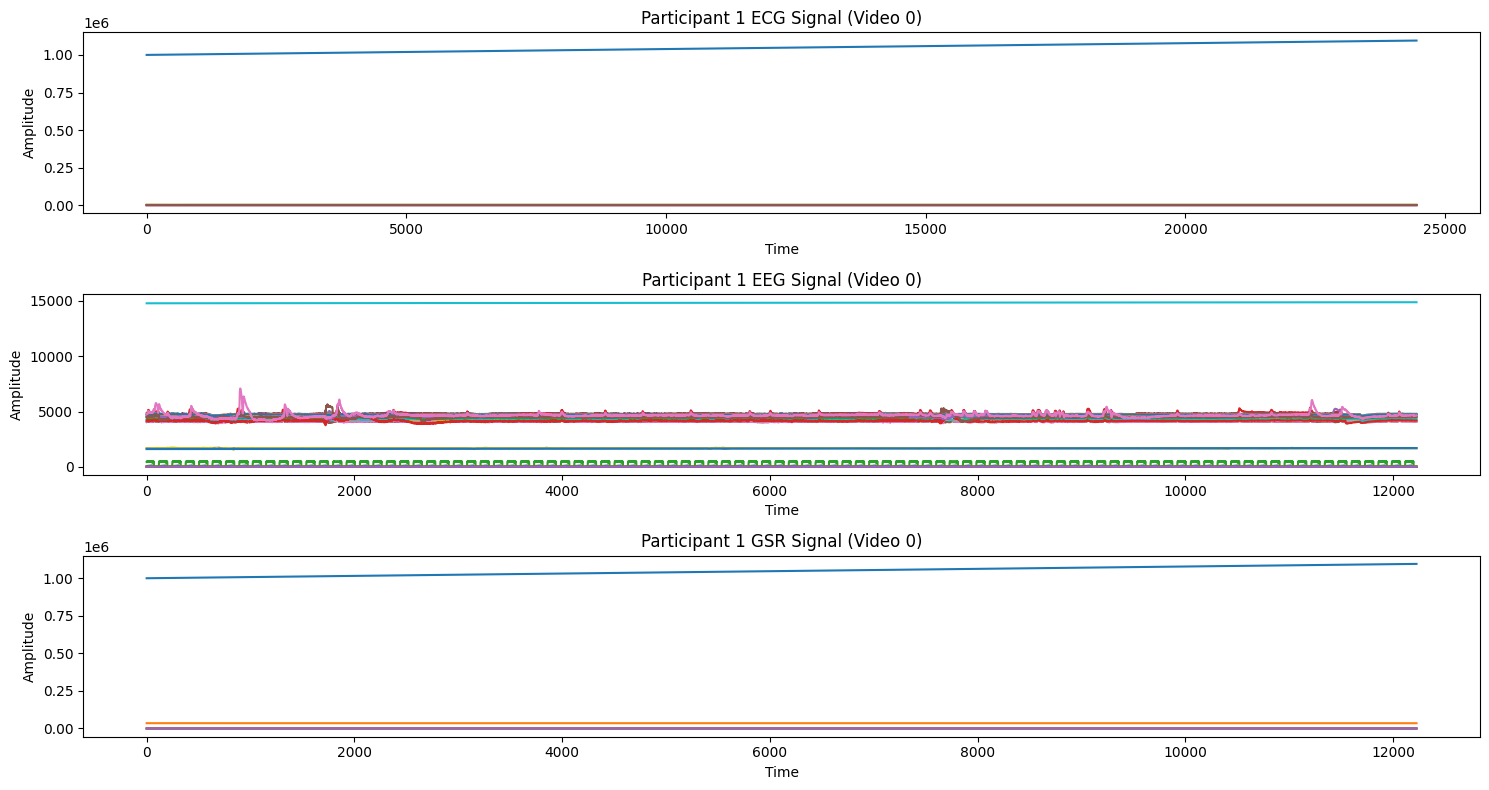

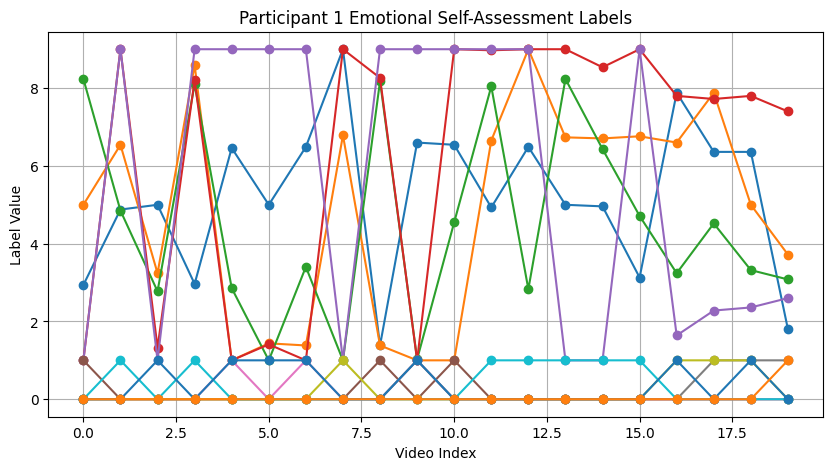

C:\Users\ferri\AppData\Local\Temp\ipykernel_21064\385216947.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_times = np.array([float(t[0]) for t in timestamps[1]])


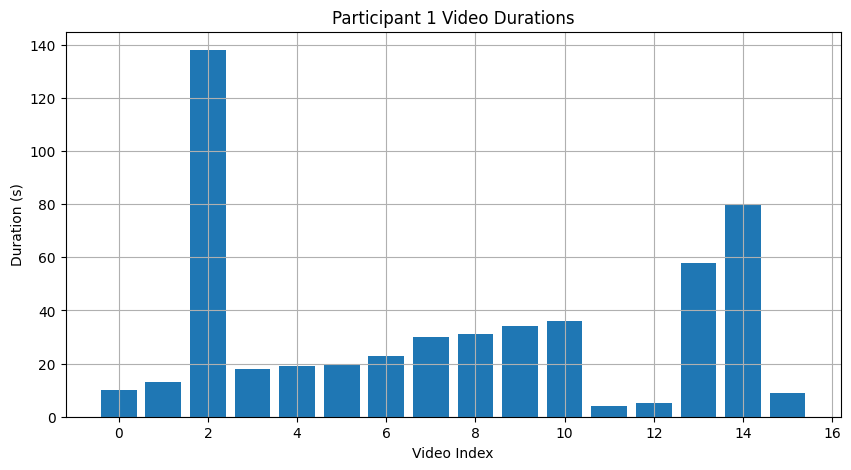

In [7]:
import os
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Directory paths
base_dir = r'C:\\Users\\ferri\\Downloads\\PoliTO\\Tesi\\DSs\\Emotion-Stress\\AMIGOS'
data_original_dir = os.path.join(base_dir, 'Data original')
data_preprocessed_dir = os.path.join(base_dir, 'Data preprocessed')
timestamps_dir = os.path.join(base_dir, 'Timestamps')

# Function to load .mat data
def load_mat_data(filepath):
    return scipy.io.loadmat(filepath)

# Analyze physiological signals (ECG, EEG, GSR)
def plot_physiological_signals(participant_number, video_index=0):
    file_path = os.path.join(data_original_dir, f'Data_Original_P{participant_number:02d}', f'Data_Original_P{participant_number:02d}.mat')
    data = load_mat_data(file_path)

    ecg = data['ECG_DATA'][0, video_index]
    eeg = data['EEG_DATA'][0, video_index]
    gsr = data['GSR_DATA'][0, video_index]

    plt.figure(figsize=(15, 8))

    plt.subplot(3, 1, 1)
    plt.plot(ecg)
    plt.title(f'Participant {participant_number} ECG Signal (Video {video_index})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(eeg)
    plt.title(f'Participant {participant_number} EEG Signal (Video {video_index})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(gsr)
    plt.title(f'Participant {participant_number} GSR Signal (Video {video_index})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Plotting emotional labels from preprocessed data
def plot_emotional_labels(participant_number):
    file_path = os.path.join(
        data_preprocessed_dir,
        f'Data_Preprocessed_P{participant_number:02d}',
        f'Data_Preprocessed_P{participant_number:02d}.mat'
    )
    data = load_mat_data(file_path)

    # labels_selfassessment is an array of arrays, let's extract numeric values
    labels_selfassessment = data['labels_selfassessment'][0]

    # Extracting values properly
    labels_values = [label.squeeze() for label in labels_selfassessment]

    plt.figure(figsize=(10, 5))
    plt.plot(range(len(labels_values)), labels_values, marker='o')
    plt.title(f'Participant {participant_number} Emotional Self-Assessment Labels')
    plt.xlabel('Video Index')
    plt.ylabel('Label Value')
    plt.grid(True)
    plt.show()


# Analyze timestamps
def plot_timestamps(participant_number, exp='Exp1'):
    file_path = os.path.join(
        timestamps_dir,
        f'{exp}_P{participant_number:02d}_timestamps',
        f'P{participant_number:02d}_timestamps.mat'
    )
    timestamps = load_mat_data(file_path)['timestamps']

    # If timestamps[0] are actually end times, and timestamps[1] are start times:
    end_times = np.array([float(t[0]) for t in timestamps[0]])
    start_times = np.array([float(t[0]) for t in timestamps[1]])
    durations = end_times - start_times

    plt.figure(figsize=(10, 5))
    plt.bar(range(len(durations)), durations)
    plt.title(f'Participant {participant_number} Video Durations')
    plt.xlabel('Video Index')
    plt.ylabel('Duration (s)')
    plt.grid(True)
    plt.show()


# Example usage
plot_physiological_signals(participant_number=1, video_index=0)
plot_emotional_labels(participant_number=1)
plot_timestamps(participant_number=1)

In [9]:
import os
import pandas as pd

# Change this to the folder where your XLSX files are located
xlsx_dir = r'C:\Users\ferri\Downloads\PoliTO\Tesi\DSs\Emotion-Stress\AMIGOS\Metadata_xlsx'

def analyze_xlsx_files(directory):
    """
    Walks through the given directory (recursively),
    finds all .xlsx files, and prints out:
      - File path
      - Sheet names
      - Each sheet's shape, columns, head (first rows)
      - Numeric summary (describe)
    """
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                print(f"\n--- Analyzing: {file_path} ---")
                try:
                    # Load Excel file
                    xls = pd.ExcelFile(file_path)
                    
                    # For each sheet in the Excel file
                    for sheet_name in xls.sheet_names:
                        df = pd.read_excel(xls, sheet_name=sheet_name)

                        # Basic info
                        print(f"\n  Sheet: {sheet_name}")
                        print(f"  Shape: {df.shape}")
                        print(f"  Columns: {df.columns.tolist()}")
                        print(f"  Head:\n{df.head()}")
                        
                        # Numeric summary
                        numeric_cols = df.select_dtypes(include=['number']).columns
                        if len(numeric_cols) > 0:
                            print("\n  Numeric summary:")
                            print(df[numeric_cols].describe())
                        else:
                            print("\n  No numeric columns to summarize.")
                
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

analyze_xlsx_files(xlsx_dir)



--- Analyzing: C:\Users\ferri\Downloads\PoliTO\Tesi\DSs\Emotion-Stress\AMIGOS\Metadata_xlsx\Experiment_Data.xlsx ---

  Sheet: Short_Videos_Order
  Shape: (40, 34)
  Columns: ['Exp1_ID', 'UserID', 'Trial 1 (Video_Number)', 'Trial 1 (VideoID)', 'Trial 2(Video_Number)', 'Trial 2 (VideoID)', 'Trial 3(Video_Number)', 'Trial 3 (VideoID)', 'Trial 4(Video_Number)', 'Trial 4 (VideoID)', 'Trial 5(Video_Number)', 'Trial 5 (VideoID)', 'Trial 6(Video_Number)', 'Trial 6 (VideoID)', 'Trial 7(Video_Number)', 'Trial 7 (VideoID)', 'Trial 8(Video_Number)', 'Trial 8 (VideoID)', 'Trial 9(Video_Number)', 'Trial 9(Video_Number).1', 'Trial 10(Video_Number)', 'Trial 10 (VideoID)', 'Trial 11(Video_Number)', 'Trial 11 (VideoID)', 'Trial 12(Video_Number)', 'Trial 12 (VideoID)', 'Trial 13(Video_Number)', 'Trial 13 (VideoID)', 'Trial 14(Video_Number)', 'Trial 14 (VideoID)', 'Trial 15(Video_Number)', 'Trial 15 (VideoID)', 'Trial 16(Video_Number)', 'Trial 16 (VideoID)']
  Head:
  Exp1_ID  UserID  Trial 1 (Video_Num

## Machine Learning emotion classification with predefined preprocessing and standard features extraction

In [25]:
import os
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for clarity

# --- Data Loading Function ---
def load_patient_preprocessed_data(patient_number):
    base_dir = r"C:\Users\ferri\Downloads\PoliTO\Tesi\DSs\Emotion-Stress\AMIGOS"
    file_path = os.path.join(
        base_dir, "Data preprocessed",
        f"Data_Preprocessed_P{patient_number:02d}",
        f"Data_Preprocessed_P{patient_number:02d}.mat"
    )
    data = scipy.io.loadmat(file_path)
    return data

# --- Feature Extraction Functions ---
def extract_features(signal):
    # Flatten the signal and check if it's empty.
    signal = signal.flatten()
    if signal.size == 0:
        return np.zeros(5)
    features = {
        "mean": np.mean(signal),
        "std": np.std(signal),
        "max": np.max(signal),
        "min": np.min(signal),
        "median": np.median(signal)
    }
    return np.array(list(features.values()))

def build_feature_matrix(joined_data):
    feature_list = []
    for i in range(joined_data.shape[1]):
        trial_data = joined_data[0, i]
        trial_data = np.array(trial_data, dtype=float).squeeze()
        feats = extract_features(trial_data)
        feature_list.append(feats)
    return np.vstack(feature_list)

# --- Label Processing Functions ---
def discretize_label(label):
    """
    Convert a continuous label [1, valence, arousal] into a descriptive class.
    The first element is ignored.
    """
    if label.size < 3:
        return "Unknown"
    valence = label[1]
    arousal = label[2]
    if valence < 0 and arousal < 0:
        return "Low valence, Low arousal"
    elif valence < 0 and arousal >= 0:
        return "Low valence, High arousal"
    elif valence >= 0 and arousal < 0:
        return "High valence, Low arousal"
    else:
        return "High valence, High arousal"

def build_patient_data(joined_data, label_array):
    X_list = []
    y_list = []
    n_trials = joined_data.shape[1]
    for i in range(n_trials):
        trial_data = joined_data[0, i]
        trial_data = np.array(trial_data, dtype=float).squeeze()
        features = extract_features(trial_data)
        
        lbl = np.array(label_array[0, i]).squeeze()
        if lbl.size == 0:
            print(f"Warning: Trial {i} has empty label. Skipping trial.")
            continue
        if lbl.ndim == 2:
            lbl_processed = np.mean(lbl, axis=0)
        elif lbl.ndim == 1:
            lbl_processed = lbl
        else:
            lbl_processed = lbl.flatten()[0]
        discrete_label = discretize_label(lbl_processed)
        
        X_list.append(features)
        y_list.append(discrete_label)
    if len(X_list) == 0:
        return None, None
    return np.vstack(X_list), np.array(y_list)

def load_all_patients_data(num_patients=40):
    X_list = []
    y_list = []
    for patient in range(1, num_patients+1):
        print(f"Loading patient {patient}")
        data = load_patient_preprocessed_data(patient)
        joined_data = data['joined_data']
        labels_array = data['labels_ext_annotation']
        X_patient, y_patient = build_patient_data(joined_data, labels_array)
        if X_patient is not None and y_patient is not None:
            X_list.append(X_patient)
            y_list.append(y_patient)
    if len(X_list) == 0:
        raise ValueError("No patient data loaded.")
    X_all = np.vstack(X_list)
    y_all = np.concatenate(y_list)
    return X_all, y_all

# --- Main Pipeline for Model Comparison and Selection ---
X, y = load_all_patients_data(num_patients=40)
print("Combined feature matrix shape:", X.shape)
print("Combined labels shape:", y.shape)

# Impute any missing values in X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Setup StratifiedKFold for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers with class_weight='balanced' where applicable
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced'),
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=500)
}

results = {}
print("\nCross-validated performance:")
for name, clf in classifiers.items():
    try:
        acc = cross_val_score(clf, X_scaled, y, cv=skf, scoring='accuracy').mean()
        f1 = cross_val_score(clf, X_scaled, y, cv=skf, scoring='f1_macro').mean()
        results[name] = {'accuracy': acc, 'f1_macro': f1}
        print(f"{name:20s}: Accuracy = {acc:.3f}, F1_macro = {f1:.3f}")
    except Exception as e:
        print(f"{name:20s}: Error during CV: {e}")

# Ensemble VotingClassifier using soft voting
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items() if clf is not None],
                              voting='soft')
try:
    acc_voting = cross_val_score(voting_clf, X_scaled, y, cv=skf, scoring='accuracy').mean()
    f1_voting = cross_val_score(voting_clf, X_scaled, y, cv=skf, scoring='f1_macro').mean()
    results['VotingClassifier'] = {'accuracy': acc_voting, 'f1_macro': f1_voting}
    print(f"{'VotingClassifier':20s}: Accuracy = {acc_voting:.3f}, F1_macro = {f1_voting:.3f}")
except Exception as e:
    print("VotingClassifier: Error during CV:", e)

# --- Select the Best Model Based on Macro F1 Score ---
best_model_name = None
best_f1 = -np.inf
for name, metrics in results.items():
    if metrics['f1_macro'] > best_f1:
        best_f1 = metrics['f1_macro']
        best_model_name = name
print("\nBest performing model:", best_model_name, "with cross-validated F1_macro:", best_f1)

# Retrieve the best model
if best_model_name in classifiers:
    best_model = classifiers[best_model_name]
elif best_model_name == 'VotingClassifier':
    best_model = voting_clf
else:
    best_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# --- Final Evaluation on Test Set using Best Model ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"\nFinal evaluation on test set for best model ({best_model_name}):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute multi-class AUC
try:
    y_test_onehot = label_binarize(y_test, classes=np.unique(y))
    y_proba = best_model.predict_proba(X_test)
    auc = roc_auc_score(y_test_onehot, y_proba, multi_class="ovr", average="macro")
    print("Multi-class AUC:", auc)
except Exception as e:
    print("Error computing AUC:", e)


Loading patient 1
Loading patient 2
Loading patient 3
Loading patient 4
Loading patient 5
Loading patient 6
Loading patient 7
Loading patient 8
Loading patient 9
Loading patient 10
Loading patient 11
Loading patient 12
Loading patient 13
Loading patient 14
Loading patient 15
Loading patient 16
Loading patient 17
Loading patient 18
Loading patient 19
Loading patient 20
Loading patient 21
Loading patient 22
Loading patient 23
Loading patient 24
Loading patient 25
Loading patient 26
Loading patient 27
Loading patient 28
Loading patient 29
Loading patient 30
Loading patient 31
Loading patient 32
Loading patient 33
Loading patient 34
Loading patient 35
Loading patient 36
Loading patient 37
Loading patient 38
Loading patient 39
Loading patient 40
Combined feature matrix shape: (740, 5)
Combined labels shape: (740,)

Cross-validated performance:
LogisticRegression  : Accuracy = 0.258, F1_macro = 0.195
KNN                 : Accuracy = 0.568, F1_macro = 0.234
SVM                 : Accuracy = 0.

## CNN features extraction and emotions classification with predefined preprocessing 

In [28]:
import os
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Fixed target length for each trial signal
TARGET_LENGTH = 1000

# --- Preprocessing functions for CNN pipeline ---

def process_trial_signal(signal, target_length=TARGET_LENGTH):
    """
    Convert a trial's raw signal into a 1D array of fixed length.
    If the signal is shorter than target_length, pad with zeros;
    if longer, truncate.
    """
    signal = np.array(signal, dtype=float).squeeze()
    if signal.size == 0:
        return np.zeros(target_length)
    if len(signal) < target_length:
        pad_width = target_length - len(signal)
        signal = np.pad(signal, (0, pad_width), mode='constant')
    else:
        signal = signal[:target_length]
    return signal

def discretize_label(label):
    """
    Convert a continuous label [1, valence, arousal] into a descriptive class.
    The first element is ignored.
    """
    if label.size < 3:
        return "Unknown"
    valence = label[1]
    arousal = label[2]
    if valence < 0 and arousal < 0:
        return "Low valence, Low arousal"
    elif valence < 0 and arousal >= 0:
        return "Low valence, High arousal"
    elif valence >= 0 and arousal < 0:
        return "High valence, Low arousal"
    else:
        return "High valence, High arousal"

def build_cnn_dataset(joined_data, label_array):
    X_list = []
    y_list = []
    n_trials = joined_data.shape[1]
    for i in range(n_trials):
        trial_data = joined_data[0, i]
        signal = process_trial_signal(trial_data, TARGET_LENGTH)
        lbl = np.array(label_array[0, i]).squeeze()
        if lbl.size == 0:
            print(f"Warning: Trial {i} has empty label. Skipping trial.")
            continue
        if lbl.ndim == 2:
            lbl_processed = np.mean(lbl, axis=0)
        elif lbl.ndim == 1:
            lbl_processed = lbl
        else:
            lbl_processed = lbl.flatten()[0]
        discrete_label = discretize_label(lbl_processed)
        X_list.append(signal)
        y_list.append(discrete_label)
    
    if len(X_list) == 0:
        # No valid trials found, so return empty arrays or handle appropriately
        return None, None

    X_arr = np.vstack([x[None, :] for x in X_list])
    return X_arr, np.array(y_list)

def load_patient_preprocessed_data(patient_number):
    base_dir = r"C:\Users\ferri\Downloads\PoliTO\Tesi\DSs\Emotion-Stress\AMIGOS"
    file_path = os.path.join(base_dir, "Data preprocessed",
                             f"Data_Preprocessed_P{patient_number:02d}",
                             f"Data_Preprocessed_P{patient_number:02d}.mat")
    data = scipy.io.loadmat(file_path)
    return data

def load_all_patients_cnn_data(num_patients=40):
    X_list = []
    y_list = []
    for patient in range(1, num_patients+1):
        print(f"Loading patient {patient}")
        data = load_patient_preprocessed_data(patient)
        joined_data = data['joined_data']
        labels_array = data['labels_ext_annotation']
        X_patient, y_patient = build_cnn_dataset(joined_data, labels_array)
        if X_patient is not None and y_patient is not None:
            X_list.append(X_patient)
            y_list.append(y_patient)
        else:
            print(f"Patient {patient} has no valid trials. Skipping.")
    if len(X_list) == 0:
        raise ValueError("No patient data loaded.")
    X_all = np.vstack(X_list)
    y_all = np.concatenate(y_list)
    return X_all, y_all


# --- Load and Prepare Data ---
X_raw, y_descriptive = load_all_patients_cnn_data(num_patients=40)
print("Raw CNN dataset shape:", X_raw.shape)  # (N, TARGET_LENGTH)
print("Raw labels shape:", y_descriptive.shape)

# Map descriptive labels to integers
unique_labels = np.unique(y_descriptive)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
y_int = np.array([label_to_int[label] for label in y_descriptive])
num_classes = len(unique_labels)
print("Unique classes:", unique_labels)
print("Label mapping:", label_to_int)

# Reshape X for CNN: (N, TARGET_LENGTH, 1)
X = X_raw

# One-hot encode labels
y_cat = to_categorical(y_int, num_classes=num_classes)

# Split data into train and test sets (stratify by labels)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

# --- Build CNN Model ---
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

input_shape = (TARGET_LENGTH, 17)
model = create_cnn_model(input_shape, num_classes)
model.summary()

# --- Train CNN ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

# --- Evaluate CNN ---
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_accuracy)

# Generate predictions and detailed classification report
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test_true, y_test_pred))
print("Classification Report:")
print(classification_report(y_test_true, y_test_pred))

# Compute multi-class AUC
try:
    auc = roc_auc_score(y_test, y_test_pred_prob, multi_class="ovr", average="macro")
    print("Multi-class AUC:", auc)
except Exception as e:
    print("Error computing AUC:", e)


Loading patient 1
Loading patient 2
Loading patient 3
Loading patient 4
Loading patient 5
Loading patient 6
Loading patient 7
Loading patient 8
Patient 8 has no valid trials. Skipping.
Loading patient 9
Loading patient 10
Loading patient 11
Loading patient 12
Loading patient 13
Loading patient 14
Loading patient 15
Loading patient 16
Loading patient 17
Loading patient 18
Loading patient 19
Loading patient 20
Loading patient 21
Loading patient 22
Loading patient 23
Loading patient 24
Patient 24 has no valid trials. Skipping.
Loading patient 25
Loading patient 26
Loading patient 27
Loading patient 28
Patient 28 has no valid trials. Skipping.
Loading patient 29
Loading patient 30
Loading patient 31
Loading patient 32
Loading patient 33
Loading patient 34
Loading patient 35
Loading patient 36
Loading patient 37
Loading patient 38
Loading patient 39
Loading patient 40
Raw CNN dataset shape: (740, 1000, 17)
Raw labels shape: (740,)
Unique classes: ['High valence, High arousal' 'High valence,

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 996, 16)        │         1,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 996, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 498, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 494, 32)        │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 494, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 247, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 243, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 243, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 121, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,006,596 (3.84 MB)

 Trainable params: 1,006,372 (3.84 MB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0786 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1146 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0907 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0903 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0759 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0888 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0866 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1006 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 9/100
15/15 ━━━━━━

## RNN LSTM features extraction and emotions classification with predefined preprocessing 

In [30]:
import os
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Fixed target length for each trial signal
TARGET_LENGTH = 1000

# --- Preprocessing functions for RNN pipeline ---

def process_trial_signal(signal, target_length=TARGET_LENGTH):
    """
    Convert a trial's raw signal into a 1D array of fixed length.
    If the signal is shorter than target_length, pad with zeros;
    if longer, truncate.
    """
    signal = np.array(signal, dtype=float).squeeze()
    if signal.size == 0:
        return np.zeros(target_length)
    if len(signal) < target_length:
        pad_width = target_length - len(signal)
        signal = np.pad(signal, (0, pad_width), mode='constant')
    else:
        signal = signal[:target_length]
    return signal

def discretize_label(label):
    """
    Convert a continuous label [1, valence, arousal] into a descriptive class.
    The first element is ignored.
    """
    if label.size < 3:
        return "Unknown"
    valence = label[1]
    arousal = label[2]
    if valence < 0 and arousal < 0:
        return "Low valence, Low arousal"
    elif valence < 0 and arousal >= 0:
        return "Low valence, High arousal"
    elif valence >= 0 and arousal < 0:
        return "High valence, Low arousal"
    else:
        return "High valence, High arousal"

def build_rnn_dataset(joined_data, label_array):
    """
    For a given patient's data, process each trial:
      - Resize the raw signal to TARGET_LENGTH.
      - Process and discretize the corresponding label.
    Returns X (shape: (n_trials, TARGET_LENGTH)) and y (descriptive labels).
    """
    X_list = []
    y_list = []
    n_trials = joined_data.shape[1]
    for i in range(n_trials):
        trial_data = joined_data[0, i]
        signal = process_trial_signal(trial_data, TARGET_LENGTH)
        lbl = np.array(label_array[0, i]).squeeze()
        if lbl.size == 0:
            print(f"Warning: Trial {i} has empty label. Skipping trial.")
            continue
        if lbl.ndim == 2:
            lbl_processed = np.mean(lbl, axis=0)
        elif lbl.ndim == 1:
            lbl_processed = lbl
        else:
            lbl_processed = lbl.flatten()[0]
        discrete_label = discretize_label(lbl_processed)
        X_list.append(signal)
        y_list.append(discrete_label)
    if len(X_list) == 0:
        return None, None
    X_arr = np.vstack([x[None, :] for x in X_list])
    return X_arr, np.array(y_list)

def load_patient_preprocessed_data(patient_number):
    base_dir = r"C:\Users\ferri\Downloads\PoliTO\Tesi\DSs\Emotion-Stress\AMIGOS"
    file_path = os.path.join(base_dir, "Data preprocessed",
                             f"Data_Preprocessed_P{patient_number:02d}",
                             f"Data_Preprocessed_P{patient_number:02d}.mat")
    data = scipy.io.loadmat(file_path)
    return data

def load_all_patients_rnn_data(num_patients=40):
    X_list = []
    y_list = []
    for patient in range(1, num_patients+1):
        print(f"Loading patient {patient}")
        data = load_patient_preprocessed_data(patient)
        joined_data = data['joined_data']
        labels_array = data['labels_ext_annotation']
        X_patient, y_patient = build_rnn_dataset(joined_data, labels_array)
        if X_patient is not None and y_patient is not None:
            X_list.append(X_patient)
            y_list.append(y_patient)
        else:
            print(f"Patient {patient} has no valid trials. Skipping.")
    if len(X_list) == 0:
        raise ValueError("No patient data loaded.")
    X_all = np.vstack(X_list)
    y_all = np.concatenate(y_list)
    return X_all, y_all

# --- Load and Prepare Data ---
X_raw, y_descriptive = load_all_patients_rnn_data(num_patients=40)
print("Raw RNN dataset shape:", X_raw.shape)  # (N, TARGET_LENGTH)
print("Raw labels shape:", y_descriptive.shape)

# Map descriptive labels to integers
unique_labels = np.unique(y_descriptive)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
y_int = np.array([label_to_int[label] for label in y_descriptive])
num_classes = len(unique_labels)
print("Unique classes:", unique_labels)
print("Label mapping:", label_to_int)

# For RNNs we expect input shape: (samples, timesteps, features)
# If your processed signal is 1D, add an axis to represent features.
if X_raw.ndim == 2:
    X = X_raw[..., np.newaxis]  # shape: (N, TARGET_LENGTH, 1)
else:
    X = X_raw  # if already (N, TARGET_LENGTH, features)

# One-hot encode labels
y_cat = to_categorical(y_int, num_classes=num_classes)

# Split data into train and test sets (stratify by labels)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

# --- Build RNN Model ---
def create_rnn_model(input_shape, num_classes):
    model = Sequential()
    # First LSTM layer with return_sequences=True to feed into the next LSTM layer
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    # Second LSTM layer
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    # Dense layer for further processing
    model.add(Dense(64, activation='relu'))
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

input_shape = X_train.shape[1:]  # should be (TARGET_LENGTH, features)
model = create_rnn_model(input_shape, num_classes)
model.summary()

# --- Train RNN ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# --- Evaluate RNN ---
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_accuracy)

# Generate predictions and detailed classification report
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test_true, y_test_pred))
print("Classification Report:")
print(classification_report(y_test_true, y_test_pred))

try:
    auc = roc_auc_score(y_test, y_test_pred_prob, multi_class="ovr", average="macro")
    print("Multi-class AUC:", auc)
except Exception as e:
    print("Error computing AUC:", e)


Loading patient 1
Loading patient 2
Loading patient 3
Loading patient 4
Loading patient 5
Loading patient 6
Loading patient 7
Loading patient 8
Patient 8 has no valid trials. Skipping.
Loading patient 9
Loading patient 10
Loading patient 11
Loading patient 12
Loading patient 13
Loading patient 14
Loading patient 15
Loading patient 16
Loading patient 17
Loading patient 18
Loading patient 19
Loading patient 20
Loading patient 21
Loading patient 22
Loading patient 23
Loading patient 24
Patient 24 has no valid trials. Skipping.
Loading patient 25
Loading patient 26
Loading patient 27
Loading patient 28
Patient 28 has no valid trials. Skipping.
Loading patient 29
Loading patient 30
Loading patient 31
Loading patient 32
Loading patient 33
Loading patient 34
Loading patient 35
Loading patient 36
Loading patient 37
Loading patient 38
Loading patient 39
Loading patient 40
Raw RNN dataset shape: (740, 1000, 17)
Raw labels shape: (740,)
Unique classes: ['High valence, High arousal' 'High valence,

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1000, 64)       │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,436 (228.27 KB)

 Trainable params: 58,436 (228.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - accuracy: 0.4439 - loss: 1.4789 - val_accuracy: 0.6555 - val_loss: 1.3749
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.7075 - loss: 1.3708 - val_accuracy: 0.6555 - val_loss: 1.3636
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 267ms/step - accuracy: 0.6770 - loss: 1.3597 - val_accuracy: 0.6555 - val_loss: 1.3526
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.6528 - loss: 1.3495 - val_accuracy: 0.6555 - val_loss: 1.3416
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.6795 - loss: 1.3361 - val_accuracy: 0.6555 - val_loss: 1.3309
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.6549 - loss: 1.3283 - val_accuracy: 0.6555 - val_loss: 1.3205
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - accuracy: 0.6937 - loss: 1.3118 - val_accuracy: 0.6555 - val_loss: 1.3100
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.6733 - loss: 1.3037 - val_accuracy: 0.

## RNN GRU features extraction and emotions classification with predefined preprocessing 

In [32]:
import os
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Fixed target length for each trial signal
TARGET_LENGTH = 1000

# --- Preprocessing functions for GRU pipeline ---

def process_trial_signal(signal, target_length=TARGET_LENGTH):
    """
    Convert a trial's raw signal into a 1D array of fixed length.
    If the signal is shorter than target_length, pad with zeros;
    if longer, truncate.
    """
    signal = np.array(signal, dtype=float).squeeze()
    if signal.size == 0:
        return np.zeros(target_length)
    if len(signal) < target_length:
        pad_width = target_length - len(signal)
        signal = np.pad(signal, (0, pad_width), mode='constant')
    else:
        signal = signal[:target_length]
    return signal

def discretize_label(label):
    """
    Convert a continuous label [1, valence, arousal] into a descriptive class.
    The first element is ignored.
    """
    if label.size < 3:
        return "Unknown"
    valence = label[1]
    arousal = label[2]
    if valence < 0 and arousal < 0:
        return "Low valence, Low arousal"
    elif valence < 0 and arousal >= 0:
        return "Low valence, High arousal"
    elif valence >= 0 and arousal < 0:
        return "High valence, Low arousal"
    else:
        return "High valence, High arousal"

def build_gru_dataset(joined_data, label_array):
    """
    For a given patient's data, process each trial:
      - Resize the raw signal to TARGET_LENGTH.
      - Process and discretize the corresponding label.
    Returns X (shape: (n_trials, TARGET_LENGTH)) and y (descriptive labels).
    """
    X_list = []
    y_list = []
    n_trials = joined_data.shape[1]
    for i in range(n_trials):
        trial_data = joined_data[0, i]
        signal = process_trial_signal(trial_data, TARGET_LENGTH)
        lbl = np.array(label_array[0, i]).squeeze()
        if lbl.size == 0:
            print(f"Warning: Trial {i} has empty label. Skipping trial.")
            continue
        if lbl.ndim == 2:
            lbl_processed = np.mean(lbl, axis=0)
        elif lbl.ndim == 1:
            lbl_processed = lbl
        else:
            lbl_processed = lbl.flatten()[0]
        discrete_label = discretize_label(lbl_processed)
        X_list.append(signal)
        y_list.append(discrete_label)
    if len(X_list) == 0:
        return None, None
    X_arr = np.vstack([x[None, :] for x in X_list])
    return X_arr, np.array(y_list)

def load_patient_preprocessed_data(patient_number):
    base_dir = r"C:\Users\ferri\Downloads\PoliTO\Tesi\DSs\Emotion-Stress\AMIGOS"
    file_path = os.path.join(base_dir, "Data preprocessed",
                             f"Data_Preprocessed_P{patient_number:02d}",
                             f"Data_Preprocessed_P{patient_number:02d}.mat")
    data = scipy.io.loadmat(file_path)
    return data

def load_all_patients_gru_data(num_patients=40):
    X_list = []
    y_list = []
    for patient in range(1, num_patients+1):
        print(f"Loading patient {patient}")
        data = load_patient_preprocessed_data(patient)
        joined_data = data['joined_data']
        labels_array = data['labels_ext_annotation']
        X_patient, y_patient = build_gru_dataset(joined_data, labels_array)
        if X_patient is not None and y_patient is not None:
            X_list.append(X_patient)
            y_list.append(y_patient)
        else:
            print(f"Patient {patient} has no valid trials. Skipping.")
    if len(X_list) == 0:
        raise ValueError("No patient data loaded.")
    X_all = np.vstack(X_list)
    y_all = np.concatenate(y_list)
    return X_all, y_all

# --- Load and Prepare Data ---
X_raw, y_descriptive = load_all_patients_gru_data(num_patients=40)
print("Raw GRU dataset shape:", X_raw.shape)  # Expected shape: (N, TARGET_LENGTH)
print("Raw labels shape:", y_descriptive.shape)

# Map descriptive labels to integers
unique_labels = np.unique(y_descriptive)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
y_int = np.array([label_to_int[label] for label in y_descriptive])
num_classes = len(unique_labels)
print("Unique classes:", unique_labels)
print("Label mapping:", label_to_int)

# For RNNs/GRUs we expect input shape: (samples, timesteps, features)
# If your processed signal is 1D, add an axis to represent features.
if X_raw.ndim == 2:
    X = X_raw[..., np.newaxis]  # shape: (N, TARGET_LENGTH, 1)
else:
    X = X_raw  # if already (N, TARGET_LENGTH, features)

# One-hot encode labels
y_cat = to_categorical(y_int, num_classes=num_classes)

# Split data into train and test sets (stratify by labels)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

# --- Build GRU Model ---
def create_gru_model(input_shape, num_classes):
    model = Sequential()
    # First GRU layer with return_sequences=True to feed into the next GRU layer
    model.add(GRU(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    # Second GRU layer
    model.add(GRU(64))
    model.add(Dropout(0.2))
    # Dense layer for further processing
    model.add(Dense(64, activation='relu'))
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

input_shape = X_train.shape[1:]  # should be (TARGET_LENGTH, features)
model = create_gru_model(input_shape, num_classes)
model.summary()

# --- Train GRU ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# --- Evaluate GRU ---
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_accuracy)

# Generate predictions and detailed classification report
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test_true, y_test_pred))
print("Classification Report:")
print(classification_report(y_test_true, y_test_pred))

try:
    auc = roc_auc_score(y_test, y_test_pred_prob, multi_class="ovr", average="macro")
    print("Multi-class AUC:", auc)
except Exception as e:
    print("Error computing AUC:", e)


Loading patient 1
Loading patient 2
Loading patient 3
Loading patient 4
Loading patient 5
Loading patient 6
Loading patient 7
Loading patient 8
Patient 8 has no valid trials. Skipping.
Loading patient 9
Loading patient 10
Loading patient 11
Loading patient 12
Loading patient 13
Loading patient 14
Loading patient 15
Loading patient 16
Loading patient 17
Loading patient 18
Loading patient 19
Loading patient 20
Loading patient 21
Loading patient 22
Loading patient 23
Loading patient 24
Patient 24 has no valid trials. Skipping.
Loading patient 25
Loading patient 26
Loading patient 27
Loading patient 28
Patient 28 has no valid trials. Skipping.
Loading patient 29
Loading patient 30
Loading patient 31
Loading patient 32
Loading patient 33
Loading patient 34
Loading patient 35
Loading patient 36
Loading patient 37
Loading patient 38
Loading patient 39
Loading patient 40
Raw GRU dataset shape: (740, 1000, 17)
Raw labels shape: (740,)
Unique classes: ['High valence, High arousal' 'High valence,

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 1000, 64)       │        15,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,316 (177.02 KB)

 Trainable params: 45,316 (177.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step - accuracy: 0.6062 - loss: 1.3570 - val_accuracy: 0.6555 - val_loss: 1.3746
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.6889 - loss: 1.3708 - val_accuracy: 0.6555 - val_loss: 1.3632
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 315ms/step - accuracy: 0.6921 - loss: 1.3583 - val_accuracy: 0.6555 - val_loss: 1.3518
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.6224 - loss: 1.3515 - val_accuracy: 0.6555 - val_loss: 1.3412
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.6482 - loss: 1.3386 - val_accuracy: 0.6555 - val_loss: 1.3304
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.6788 - loss: 1.3247 - val_accuracy: 0.6555 - val_loss: 1.3197
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.6864 - loss: 1.3123 - val_accuracy: 0.6555 - val_loss: 1.3093
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.6587 - loss: 1.3063 - val_accuracy: 0.

## CNN features extraction and machine learning emotions classification with predefined preprocessing 

In [ ]:
import os
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Preprocessing functions remain the same
TARGET_LENGTH = 1000

def process_trial_signal(signal, target_length=TARGET_LENGTH):
    signal = np.array(signal, dtype=float).squeeze()
    if signal.size == 0:
        return np.zeros(target_length)
    if len(signal) < target_length:
        pad_width = target_length - len(signal)
        signal = np.pad(signal, (0, pad_width), mode='constant')
    else:
        signal = signal[:target_length]
    return signal

def discretize_label(label):
    if label.size < 3:
        return "Unknown"
    valence = label[1]
    arousal = label[2]
    if valence < 0 and arousal < 0:
        return "Low valence, Low arousal"
    elif valence < 0 and arousal >= 0:
        return "Low valence, High arousal"
    elif valence >= 0 and arousal < 0:
        return "High valence, Low arousal"
    else:
        return "High valence, High arousal"

def build_cnn_dataset(joined_data, label_array):
    X_list = []
    y_list = []
    n_trials = joined_data.shape[1]
    for i in range(n_trials):
        trial_data = joined_data[0, i]
        signal = process_trial_signal(trial_data, TARGET_LENGTH)
        lbl = np.array(label_array[0, i]).squeeze()
        if lbl.size == 0:
            print(f"Warning: Trial {i} has empty label. Skipping trial.")
            continue
        if lbl.ndim == 2:
            lbl_processed = np.mean(lbl, axis=0)
        elif lbl.ndim == 1:
            lbl_processed = lbl
        else:
            lbl_processed = lbl.flatten()[0]
        discrete_label = discretize_label(lbl_processed)
        X_list.append(signal)
        y_list.append(discrete_label)
    if len(X_list) == 0:
        return None, None
    X_arr = np.vstack([x[None, :] for x in X_list])
    return X_arr, np.array(y_list)

def load_patient_preprocessed_data(patient_number):
    base_dir = r"C:\Users\ferri\Downloads\PoliTO\Tesi\DSs\Emotion-Stress\AMIGOS"
    file_path = os.path.join(base_dir, "Data preprocessed",
                             f"Data_Preprocessed_P{patient_number:02d}",
                             f"Data_Preprocessed_P{patient_number:02d}.mat")
    data = scipy.io.loadmat(file_path)
    return data

def load_all_patients_cnn_data(num_patients=40):
    X_list = []
    y_list = []
    for patient in range(1, num_patients+1):
        print(f"Loading patient {patient}")
        data = load_patient_preprocessed_data(patient)
        joined_data = data['joined_data']
        labels_array = data['labels_ext_annotation']
        X_patient, y_patient = build_cnn_dataset(joined_data, labels_array)
        if X_patient is not None and y_patient is not None:
            X_list.append(X_patient)
            y_list.append(y_patient)
        else:
            print(f"Patient {patient} has no valid trials. Skipping.")
    if len(X_list) == 0:
        raise ValueError("No patient data loaded.")
    X_all = np.vstack(X_list)
    y_all = np.concatenate(y_list)
    return X_all, y_all

# Data Loading
X_raw, y_descriptive = load_all_patients_cnn_data(num_patients=40)
print("Raw dataset shape:", X_raw.shape)
print("Raw labels shape:", y_descriptive.shape)

# Map labels to integers
unique_labels = np.unique(y_descriptive)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
y_int = np.array([label_to_int[label] for label in y_descriptive])
num_classes = len(unique_labels)
print("Unique classes:", unique_labels)
print("Label mapping:", label_to_int)

# Reshape for CNN: (samples, timesteps, channels)
if X_raw.ndim == 2:
    X = X_raw[..., np.newaxis]
else:
    X = X_raw

# One-hot encode labels for CNN training
y_cat = to_categorical(y_int, num_classes=num_classes)

# Split data
X_train, X_test, y_train, y_test, y_int_train, y_int_test = train_test_split(
    X, y_cat, y_int, test_size=0.2, random_state=42, stratify=y_cat
)

# Build the CNN feature extractor with an explicit Input layer
def create_cnn_feature_extractor(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=16, kernel_size=5, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=32, kernel_size=5, activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=64, kernel_size=5, activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    features = Flatten(name='features')(x)
    x = Dense(128, activation='relu')(features)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

input_shape = X_train.shape[1:]  # e.g. (1000, channels)
cnn_model = create_cnn_feature_extractor(input_shape, num_classes)
cnn_model.summary()

# Train the CNN
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32,
                            validation_split=0.2, callbacks=[early_stop], verbose=1)

test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Test Accuracy:", test_acc)

# Create feature extractor model from the 'features' layer
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('features').output)

# Extract features for ML classifiers
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)

# Define and evaluate ML classifiers using the extracted features
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for clf_name, clf in classifiers.items():
    print(f"\n----- {clf_name} -----")
    clf.fit(train_features, y_int_train)
    pred = clf.predict(test_features)
    
    acc = accuracy_score(y_int_test, pred)
    print("Accuracy:", acc)
    print("Confusion Matrix:")
    print(confusion_matrix(y_int_test, pred))
    print("Classification Report:")
    print(classification_report(y_int_test, pred))
    
    try:
        prob = clf.predict_proba(test_features)
        auc = roc_auc_score(to_categorical(y_int_test, num_classes=num_classes), prob,
                            multi_class="ovr", average="macro")
        print("Multi-class AUC:", auc)
    except Exception as e:
        print("AUC could not be computed:", e)


Loading patient 1
Loading patient 2
Loading patient 3
Loading patient 4
Loading patient 5
Loading patient 6
Loading patient 7
Loading patient 8
Patient 8 has no valid trials. Skipping.
Loading patient 9
Loading patient 10
Loading patient 11
Loading patient 12
Loading patient 13
Loading patient 14
Loading patient 15
Loading patient 16
Loading patient 17
Loading patient 18
Loading patient 19
Loading patient 20
Loading patient 21
Loading patient 22
Loading patient 23
Loading patient 24
Patient 24 has no valid trials. Skipping.
Loading patient 25
Loading patient 26
Loading patient 27
Loading patient 28
Patient 28 has no valid trials. Skipping.
Loading patient 29
Loading patient 30
Loading patient 31
Loading patient 32
Loading patient 33
Loading patient 34
Loading patient 35
Loading patient 36
Loading patient 37
Loading patient 38
Loading patient 39
Loading patient 40
Raw dataset shape: (740, 1000, 17)
Raw labels shape: (740,)
Unique classes: ['High valence, High arousal' 'High valence, Low

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 996, 16)        │         1,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 996, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 498, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 494, 32)        │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 494, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 247, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 243, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 243, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 121, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ features (Flatten)              │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,006,596 (3.84 MB)

 Trainable params: 1,006,372 (3.84 MB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.1484 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0915 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0941 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0921 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0868 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0947 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0829 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0929 - loss: nan - val_accuracy: 0.1008 - val_loss: nan
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━

AttributeError: The layer sequential_9 has never been called and thus has no defined input.